In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import pickle

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

caminho = "C:\\Users\\anny_\\Documents\\The_Glassdoor_Project\\"

In [18]:
df = pd.read_csv(caminho + 'Output\\eda_data.csv')

df_model = df[['med_salary','Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_competitors', 'Per Hour',    'Employer_Provided', 'State', 'age', 'python_yn', 'spark', 'aws', 'excel', 'Job_Simplif', 'Seniority', 'description_len']]
df_dum = pd.get_dummies(df_model)

In [19]:
# Train test
X = df_dum.drop('med_salary', axis=1)
y = df_dum.med_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Multiple linear regression
X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

.619      0.536     -15.029       7.825
Size_1001 to 5000 employees                           6.1423      3.881      1.583      0.114      -1.480      13.765
Size_201 to 500 employees                             2.3816      3.836      0.621      0.535      -5.152       9.915
Size_5001 to 10000 employees                         -3.9736      5.419     -0.733      0.464     -14.617       6.670
Size_501 to 1000 employees                            1.7093      4.028      0.424      0.671      -6.202       9.621
Size_51 to 200 employees                              4.6633      4.338      1.075      0.283      -3.855      13.182
Size_Unknown                                         19.8685     14.001      1.419      0.156      -7.629      47.366
Type of ownership_-1                                 13.1014      8.638      1.517      0.130      -3.862      30.065
Type of ownership_College / University                7.0759     17.733      0.399      0.690     -27.751      41.903
Type of ownership_Company - Private                   8.5816      5.249      1.635      0.103      -1.726      18.889
Type of ownership_Company - Public                   12.9126      5.700      2.265      0.024       1.719      24.107
Type of ownership_Government                        -18.6940     15.200     -1.230      0.219     -48.545      11.157
Type of ownership_Hospital                           -6.0334      9.877     -0.611      0.542     -25.431      13.364
Type of ownership_Nonprofit Organization             -9.1899      6.675     -1.377      0.169     -22.299       3.919
Type of ownership_Other Organization                 -5.5673     14.383     -0.387      0.699     -33.814      22.680
Type of ownership_School / School District           -7.0725     23.787     -0.297      0.766     -53.789      39.644
Type of ownership_Subsidiary or Business Segment     12.6865      6.936      1.829      0.068      -0.936      26.309
Type of ownership_Unknown                            34.0605     28.645      1.189      0.235     -22.195      90.316
Industry_-1                                           5.4348      7.947      0.684      0.494     -10.172      21.042
Industry_Accounting                                   1.8640     13.505      0.138      0.890     -24.658      28.386
Industry_Advertising & Marketing                     12.1133      5.956      2.034      0.042       0.415      23.811
Industry_Aerospace & Defense                          5.0632      3.092      1.638      0.102      -1.009      11.135
Industry_Architectural & Engineering Services       -34.6613     15.829     -2.190      0.029     -65.749      -3.574
Industry_Auctions & Galleries                         9.7467     22.892      0.426      0.670     -35.212      54.705
Industry_Banks & Credit Unions                      -17.3156      8.062     -2.148      0.032     -33.148      -1.483
Industry_Beauty & Personal Accessories Stores        15.8971     21.589      0.736      0.462     -26.503      58.297
Industry_Biotech & Pharmaceuticals                    6.3211      2.048      3.087      0.002       2.299      10.343
Industry_Brokerage Services                          27.1822     15.543      1.749      0.081      -3.344      57.708
Industry_Colleges & Universities                     11.3230     13.029      0.869      0.385     -14.266      36.912
Industry_Computer Hardware & Software                -0.6687      3.235     -0.207      0.836      -7.021       5.684
Industry_Construction                               -14.6362     10.552     -1.387      0.166     -35.359       6.086
Industry_Consulting                                  12.6970      5.907      2.149      0.032       1.096      24.299
Industry_Consumer Product Rental                     -0.8486     12.998     -0.065      0.948     -26.375      24.678
Industry_Consumer Products Manufacturing             14.1745      9.755      1.453      0.147      -4.984      33.333
Industry_Department, Clothing, & Shoe Stores          3.7326     1

In [21]:
# Multiple Linear Regression
ln = LinearRegression()
ln.fit(X_train, y_train)

np.mean(cross_val_score(ln, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-20.908052996233625

,alpha,error
15,0.16,-19.275948


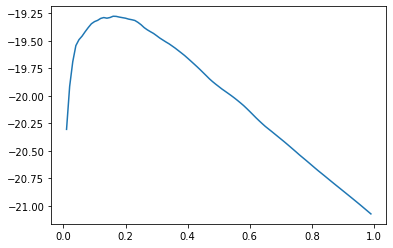

In [22]:
# Lasso Regression
ln_l = Lasso(alpha=.13)
ln_l.fit(X_train, y_train)
np.mean(cross_val_score(ln_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lnl=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lnl, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)))
plt.plot(alpha, error)

err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns=['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

In [23]:
# Random Forest
rf = RandomForestRegressor()
cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)

array([-15.9019697 , -15.0730303 , -14.07527919])

In [24]:
# Tune Models GridSearchCV
parameters={'n_estimators':range(10,100,10), 'criterion':('mse', 'moe'), 'max_features':('auto', 'sqrt', 'log2')}
gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'moe'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [25]:
gs.best_score_

-14.98601098406513

In [26]:
gs.best_estimator_

RandomForestRegressor(n_estimators=90)

In [27]:
# test ensembles 
tpred_ln = ln.predict(X_test)
tpred_lnl = ln_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [28]:
mean_absolute_error(y_test, tpred_ln)

18.95072966061347

In [29]:
mean_absolute_error(y_test, tpred_lnl)

19.857160070210032

In [30]:
mean_absolute_error(y_test, tpred_rf)

11.077628635346755

In [31]:
mean_absolute_error(y_test, (tpred_ln+tpred_rf)/2)

14.376865197936462

In [32]:
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "C:\\Users\\anny_\\Documents\\The_Glassdoor_Project\\FlaskAPI\\model\\model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[3.6,
 1.0,
 0.0,
 0.0,
 34.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
